In [0]:
import numpy as np
import pandas as pd
import cmath
import math
import random

In [0]:
N = 64
z=[]
for i in range(N):
    z.append(random.uniform(0, 100))

In [0]:
#DCT

def dct(z,N):
  # x=[8,16,24,32,40,48,56,64]
  # print(x)
  # W=complex(math.cos(2*math.pi/2*N), -math.sin(2*math.pi/2*N))
  Z=[0]*(N)
  for k in range(N):
    for i in range(N):
      Z[k] = Z[k] + 2*z[i]*math.cos(math.pi*k*(2*i+1)/(2*N))
  print(Z)
  return Z

In [4]:
Z_dct=dct(z,N)
def idct(y,N):
  X=[0]*N
 # y = [576.0, -206.15433672656437, -4.263256414560601e-14, -21.550553628926068, 0.0, -6.428892919551728, -8.526512829121202e-14, -1.622474328308769]
  for n in range(N):
    for k in range(N):
      if(k == 0):
        X[n]=X[n] + (1/2)*y[k]*math.cos(math.pi * k * (2*n + 1)/ (2*N))
      else:
        X[n]=X[n]+ y[k]*math.cos(math.pi * k * (2*n + 1)/ (2*N))
    X[n] = (1/N) * X[n]
  return X


[6289.7857553562035, -199.0329395492847, 332.06348914479076, -91.15224176620994, -96.71436539945745, 55.82806762271274, 102.57272760377055, -506.5429350867115, -93.92936635336619, 235.3060212992362, 224.25966284833757, 346.10492180682036, 345.35074799016587, 15.256966297512385, 13.3762114803422, -225.2222281021576, -138.06739271206175, 830.15311316065, -272.446859958718, -140.80525356243638, 89.73947560282268, 419.68789646044263, 689.4792362407534, 341.09192581961315, 382.80694785397486, 46.15046574900262, -5.942964477219753, -9.384435016624181, -446.6283110646352, 262.7322724749756, 346.21690753182924, 355.2581829435638, -362.9065700161682, -425.6773220646794, -100.48251738000391, 420.6004269010902, 299.29998791471905, 738.4516322083907, -293.8830782565142, 54.03531566457589, 426.6417329044086, -489.0756083300479, 324.64221677753, -334.781524536145, -629.9313321751226, 385.64760370562874, 132.74478862295976, -154.412288358467, -419.01423393792766, 261.845285537125, -728.0849829898008,

In [0]:
def modified(Z_dct,N):
  L=[i for i in range(64)]
  x = []
  for l in L:
    Xm=[0]*N
    for k in range(N-l):
      Xm[k]=Z_dct[k]
    x.append(Xm)
  return x

In [0]:
c=modified(Z_dct,64)
c_out = []
for j in range(64):
  c_out.append(idct(c[j],64))

In [0]:
e1 = []
for i in range (64):
  e1.append((np.sum(abs(np.array(z)-np.array(c_out[i]))**2)) / 64)
  

In [0]:
#DFT

def dft(x,N):
  W = complex(math.cos(2*math.pi/N), -math.sin(2*math.pi/N))
  W_matrix = np.ndarray(shape=(N,N), dtype=np.complex128)
  for i in range(N):
    for j in range(N):
      W_matrix[i][j] = (W**(i*j))
  x = np.matrix(x)
  return np.array(W_matrix.dot(x.T))[:,0]

In [0]:
Z_dft= dft(z,N)

In [0]:
def idft(x,N):
  W = complex(math.cos(2*math.pi/N), -math.sin(2*math.pi/N))
  W_matrix = np.ndarray(shape=(N,N), dtype=np.complex128)
  for i in range(N):
    for j in range(N):
      W_matrix[i][j] = 1/(W**(i*j))
  x = np.matrix(x)
  return (1/N)*np.array(W_matrix.dot(x.T))[:,0]

In [0]:
def modified(Z_dft,N):
  L=[i for i in range(64)]
  x = []
  for l in L:
    Xm=[0]*N
    for k in range(int((N-l-1)/2)+1):
      Xm[k]=Z_dft[k]
    for k in range(int((N+l+1)/2)+1,N):
      Xm[k]=Z_dft[k]
    x.append(Xm)
  return x

In [0]:
c1=modified(Z_dft,64)
c_out1 = []
for j in range(64):
  c_out1.append(idft(c1[j],64))

In [0]:
e2 = []
for i in range (64):
  e2.append((np.sum(abs(np.array(z)-np.array(c_out1[i]))**2)) / 64)

In [0]:
#HAAR

h2 = np.array([[1,1],[1,-1]])
def haar_mat(n):
  n = int(n)
  if n == 1:
    return h2
  else:
    a = np.kron(haar_mat(n-1),[1,1])
    b = np.kron(np.identity(int(math.pow(2,n-1)))*math.pow(2,(n-1)/2.0),[1,-1])
    return np.concatenate((a,b),axis=0)
def haar(x):
    return np.matmul(haar_mat(math.log(len(x),2)),np.transpose(x))

In [0]:
def inverse_haar(y):
  n = int(math.log(len(y),2))
  N = len(y)
  hn = haar_mat(n)
  return np.matmul(np.transpose(hn)/N,np.transpose(y))

In [0]:
def modified_haar(x, N):
  L=[i for i in range(64)]
  x_mod = []
  for l in L:
    y = [0]*N
    for i in range(N-l):
      y[i] = x[i]
    x_mod.append(y)
  return x_mod

In [0]:
x = np.array(z)
z_haar = haar(x)
mod_haar = modified_haar(z_haar,N)
mod_ihaar = []
for j in range(N):
  mod_ihaar.append(inverse_haar(mod_haar[j]))

In [0]:
e_haar = []
for i in range(N):
  e_haar.append((np.sum(abs(x-np.array(mod_ihaar[i]))**2)) / N)

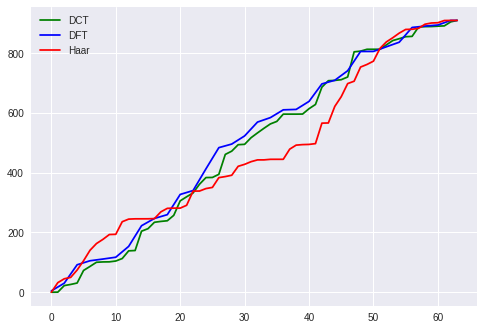

In [19]:
import matplotlib.pyplot as plt
plt.plot(e1,'g',label = "DCT")
plt.plot(e2,'b',label = "DFT")
plt.plot(e_haar,'r',label = "Haar")
plt.legend(loc='upper left')  
plt.show()